In [1]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 73.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 111.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 47.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [2]:
!git clone "https://github.com/laxmimerit/twitter-disaster-prediction-dataset"

Cloning into 'twitter-disaster-prediction-dataset'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 592.41 KiB | 7.59 MiB/s, done.


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain 
from ktrain import text
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_train = pd.read_csv("twitter-disaster-prediction-dataset/train.csv",dtype=str)
data_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   object
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   object
dtypes: object(5)
memory usage: 297.5+ KB


In [6]:
data_train.describe()

,id,keyword,location,text,target
count,7613,7552,5080,7613,7613
unique,7613,221,3341,7503,2
top,1,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,0
freq,1,45,104,10,4342


In [20]:
(X_train,y_train),(X_test,y_test),preprocess = text.texts_from_df(
    train_df = data_train,
    text_column = "text",
    label_columns="target",
    val_df= data_train,
    maxlen = 40,
    preprocess_mode='bert',
)

['0', '1']
     0    1
0  0.0  1.0
1  0.0  1.0
2  0.0  1.0
3  0.0  1.0
4  0.0  1.0
['0', '1']
     0    1
0  0.0  1.0
1  0.0  1.0
2  0.0  1.0
3  0.0  1.0
4  0.0  1.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [21]:
X_train[0].shape

(7613, 40)

In [22]:
model = text.text_classifier(name="bert",train_data=(X_train,y_train),preproc=preprocess)

Is Multi-Label? False
maxlen is 40
done.


In [23]:
learner = ktrain.get_learner(model = model,
                             train_data = (X_train,y_train),
                             val_data = (X_test,y_test),
                             batch_size = 64)

In [25]:
learner.fit_onecycle(lr = 2e-5, epochs = 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
119/119 [==============================] - 107s 745ms/step - loss: 0.4930 - accuracy: 0.7718 - val_loss: 0.3713 - val_accuracy: 0.8446
Epoch 2/3
119/119 [==============================] - 84s 711ms/step - loss: 0.3717 - accuracy: 0.8454 - val_loss: 0.2933 - val_accuracy: 0.8886
Epoch 3/3
119/119 [==============================] - 84s 709ms/step - loss: 0.2825 - accuracy: 0.8922 - val_loss: 0.2276 - val_accuracy: 0.9183


In [28]:
predictor = ktrain.get_predictor(learner.model,preprocess)

In [34]:
data = ['i met you today by accident','i got today car accident','i am injured']

In [35]:
predictor.predict(data,return_proba=True)

1/1 [==============================] - 0s 39ms/step


array([[0.9354337 , 0.06456628],
       [0.20962234, 0.7903777 ],
       [0.905804  , 0.09419604]], dtype=float32)

In [36]:
predictor.predict(data[1])

1/1 [==============================] - 0s 31ms/step


'1'

In [37]:
predictor.get_classes()

['0', '1']

In [38]:
data_train.shape

(7613, 5)

# EXPLORATORY DATA ANALYSIS

In [39]:
plt.rcParams['figure.figsize'] =[10,5]
plt.rcParams['figure.dpi']=120

Text(0.5, 1.0, 'Real or Wrong Tweet')

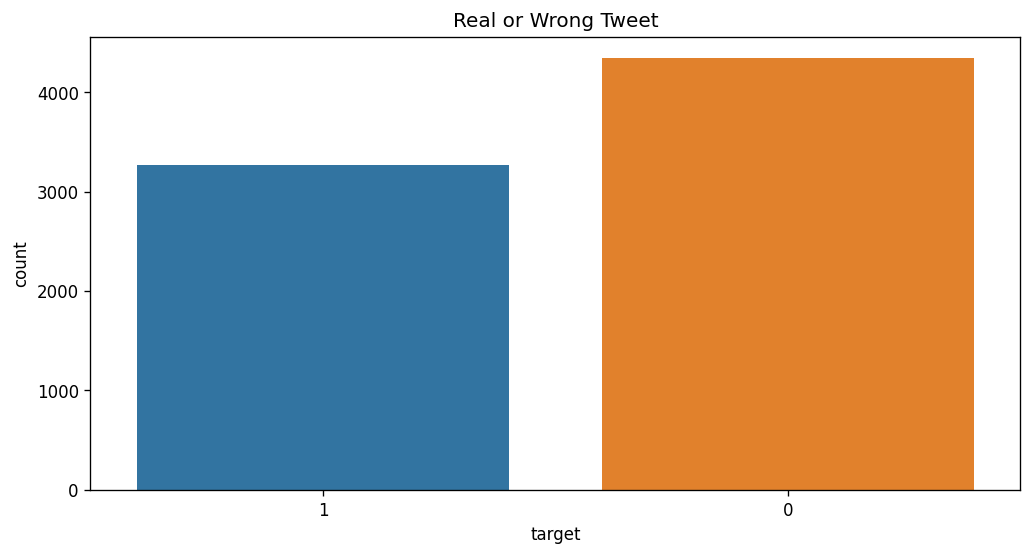

In [40]:
sns.countplot('target',data=data_train)
plt.title('Real or Wrong Tweet')

In [41]:
data_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

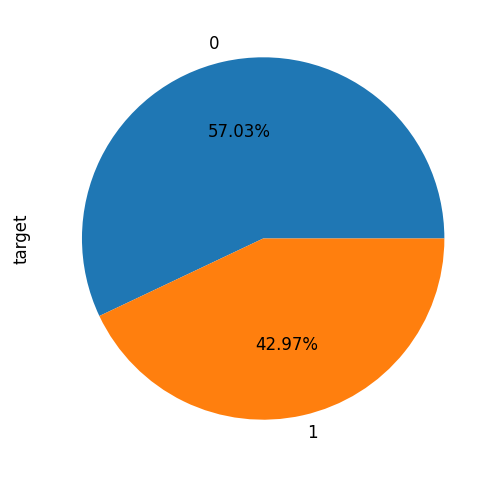

In [43]:
data_train['target'].value_counts().plot.pie(autopct="%1.2f%%")

In [44]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-f3jihxsz
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-f3jihxsz
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11755 sha256=c8098c2bf671a24307a7d0b370b93dce2ce2ec2ba6dc1eb875d154290617eba0
  Stored in directory: /tmp/pip-ephem-wheel-cache-qqf8wvov/wheels/fd/71/47/e04f208ad659a295ccb69022e14de7d20ccc6fc30a5a935f09
Successfully built preprocess-kgptalkie


In [45]:
import preprocess_kgptalkie as kgp

In [46]:
kgp.get_basic_features(data_train)

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,73,11,6.636364,2,0,0,2,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,106,20,5.300000,9,0,2,2,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,58,8,7.250000,1,0,0,7,2
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,119,19,6.263158,6,0,0,2,0


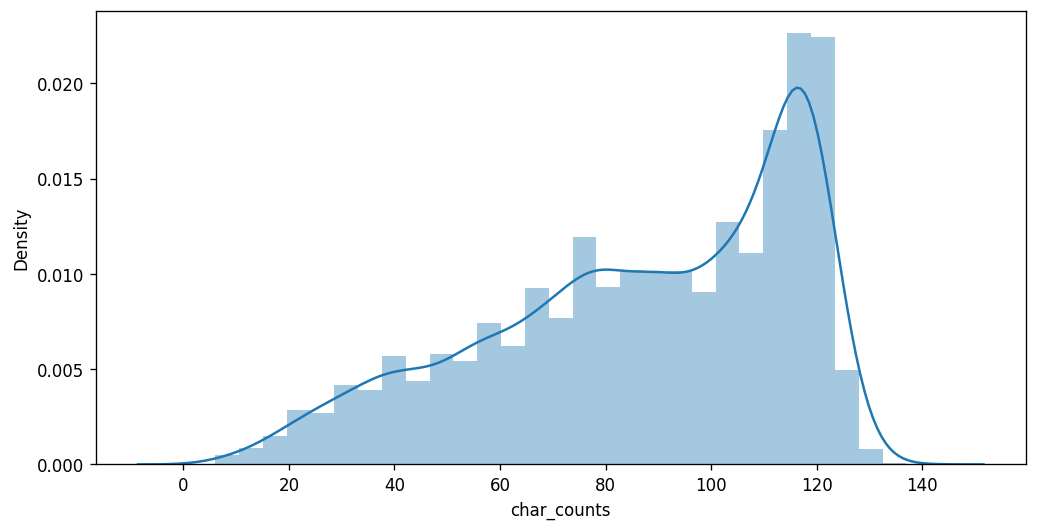

In [47]:
sns.distplot(data_train['char_counts'])

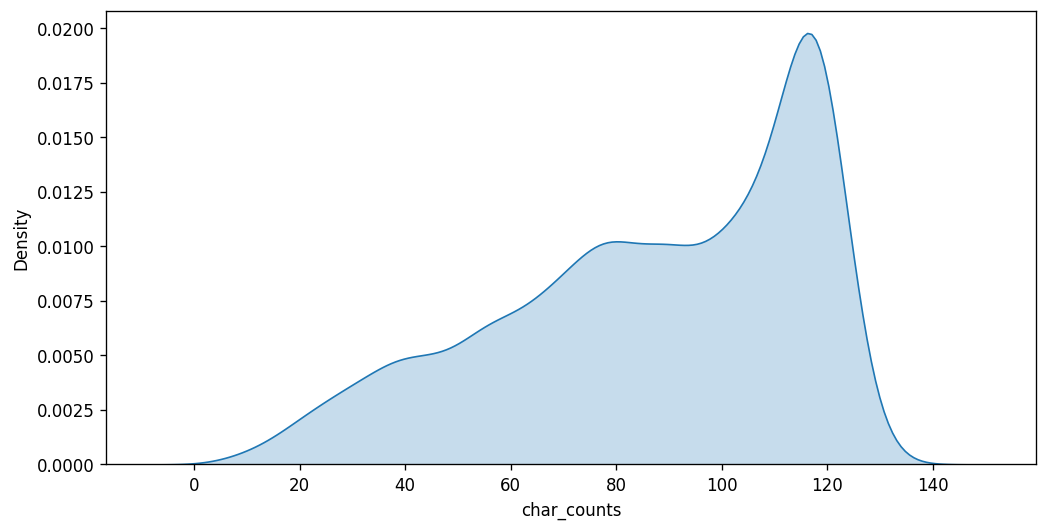

In [49]:
sns.kdeplot(data_train['char_counts'],shade=True)

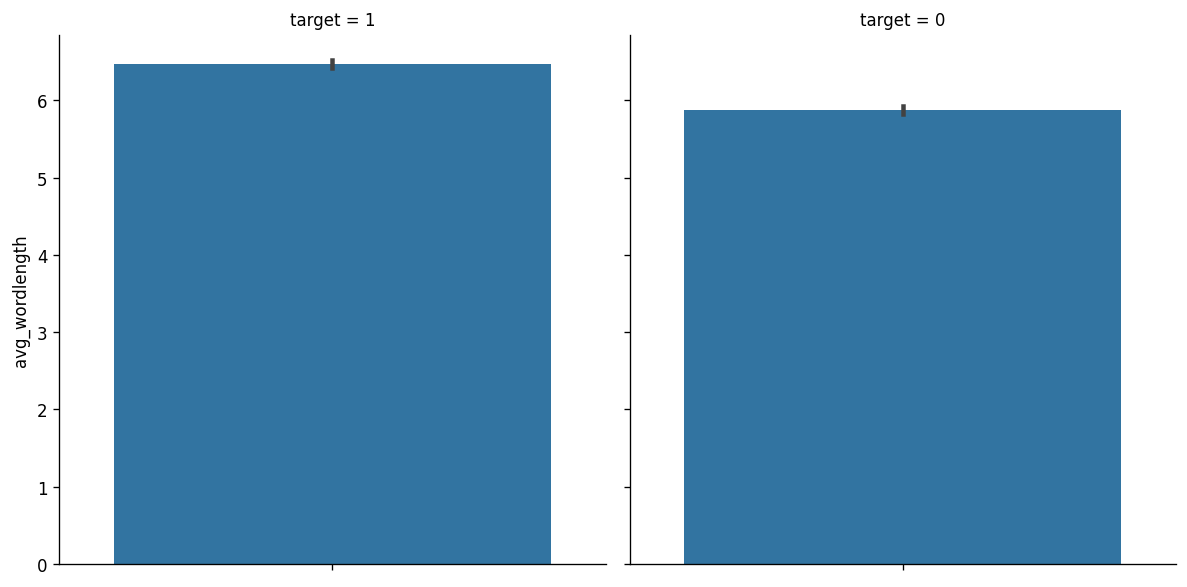

In [85]:
sns.catplot(y='avg_wordlength',data=data_train,kind='bar',col='target')

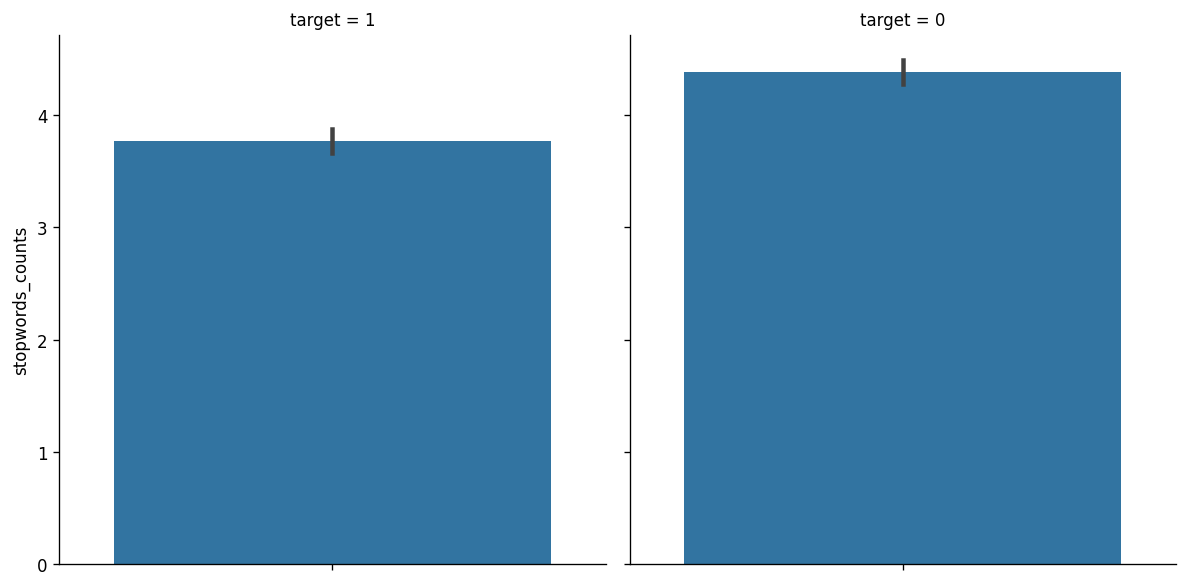

In [87]:
sns.catplot(y='stopwords_counts',data=data_train,kind='bar',col='target')

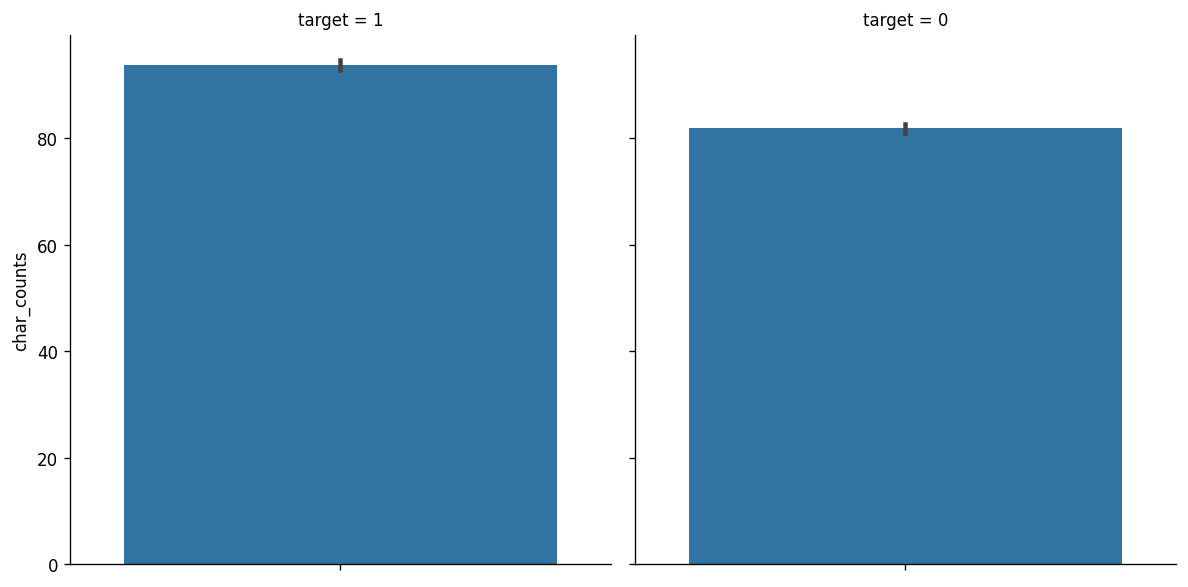

In [89]:
sns.catplot(y='char_counts',data=data_train,kind='bar',col='target')

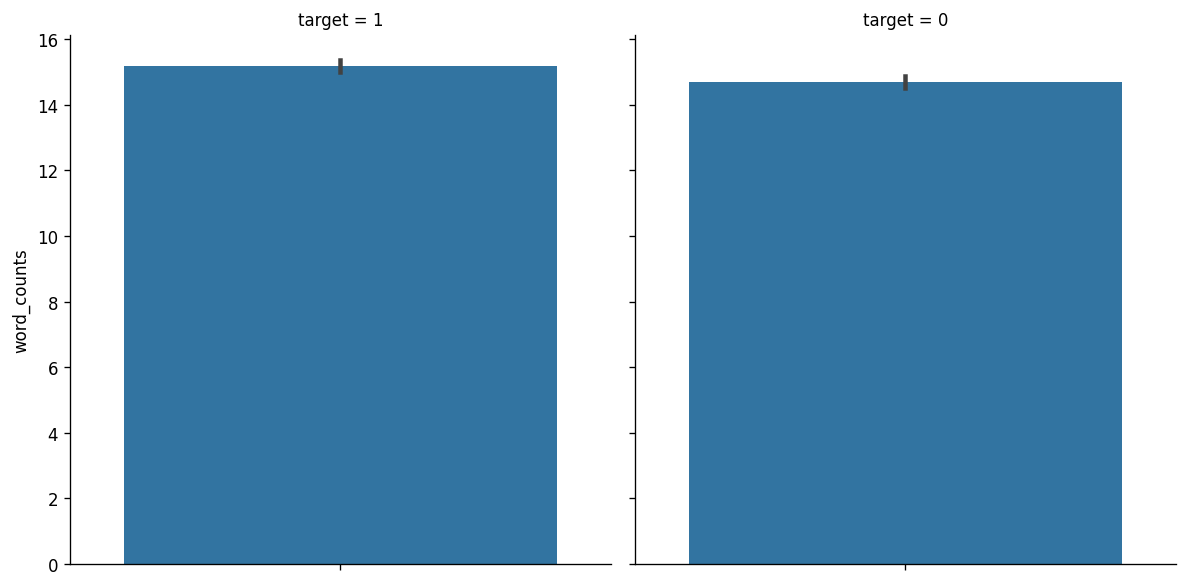

In [91]:
sns.catplot(y='word_counts',data=data_train,kind='bar',col='target')

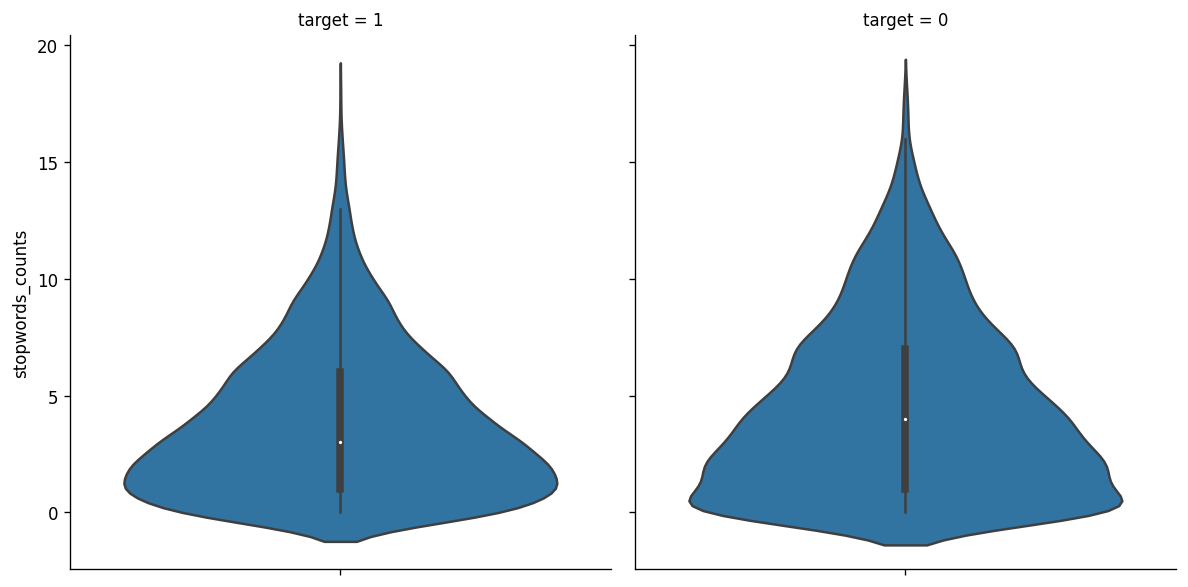

In [73]:
sns.catplot(y='stopwords_counts',data=data_train,kind='violin',col='target')

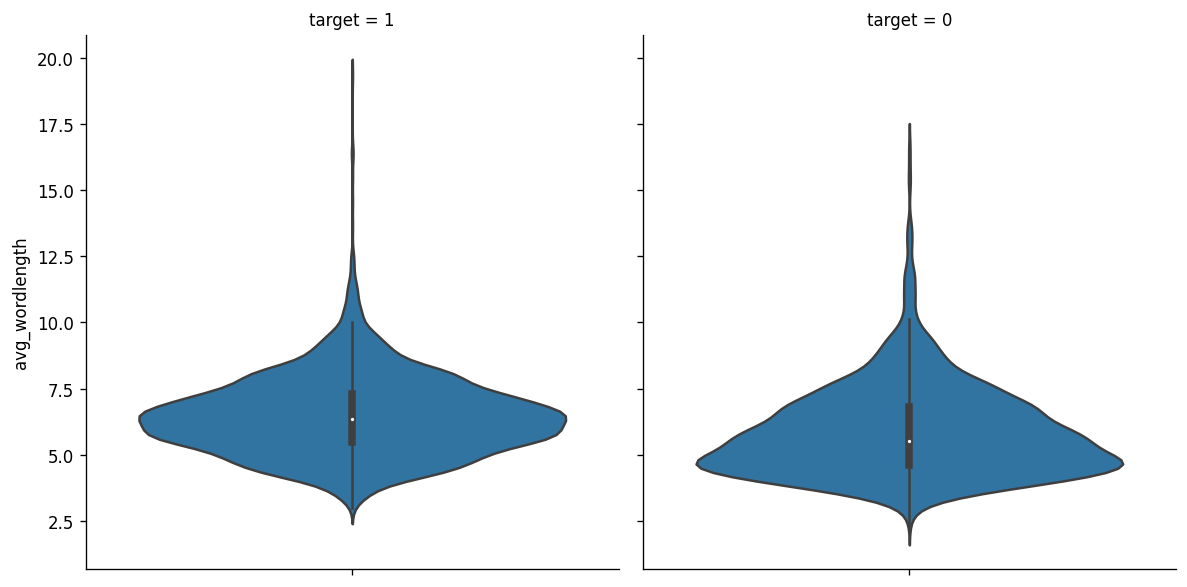

In [74]:
sns.catplot(y='avg_wordlength',data=data_train,kind='violin',col='target')

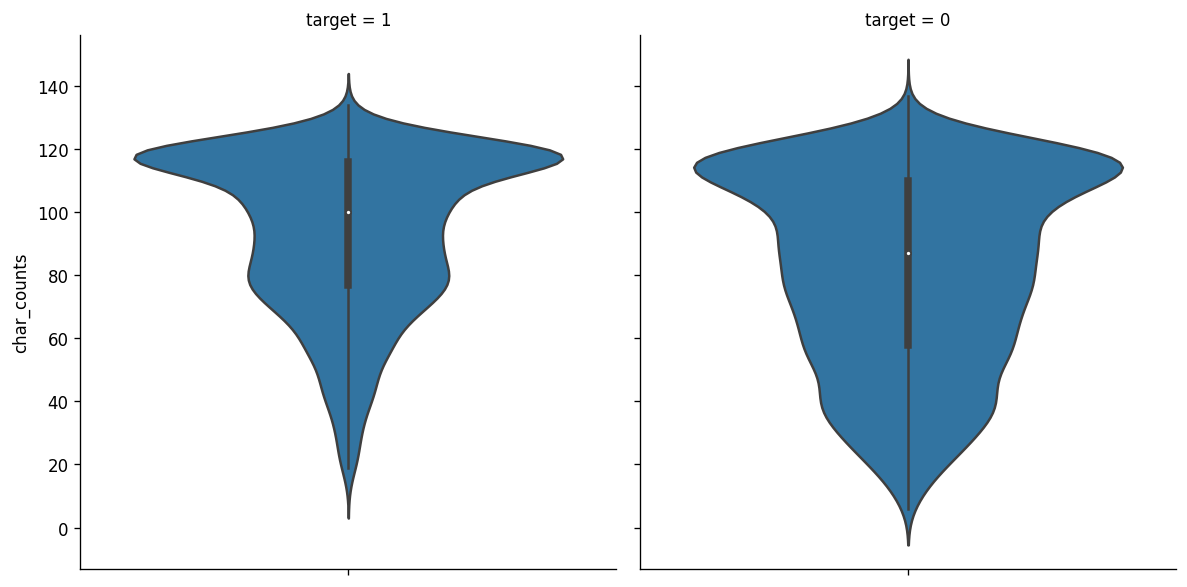

In [64]:
sns.catplot(y='char_counts',data=data_train,kind='violin',col='target')

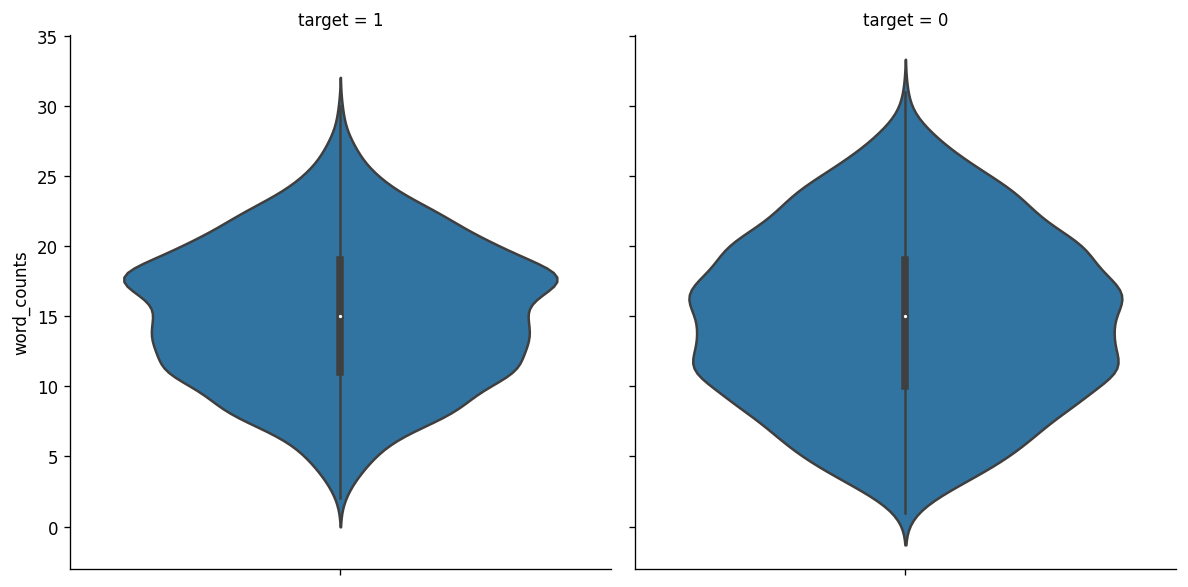

In [72]:
sns.catplot(y='word_counts',data=data_train,kind='violin',col='target')